# Informacion de Covid 19

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('db/covid_19_data.csv')
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df.sample(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
6,7,2020-01-22,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
184,185,2020-01-26,Hainan,Mainland China,1/26/20 16:00,22.0,0.0,0.0
1930,1931,2020-02-20,NaN,Finland,2020-02-12T00:03:12,1.0,0.0,1.0
2813,2814,2020-02-29,"Tempe, AZ",US,2020-02-25T21:23:03,1.0,0.0,1.0
1425,1426,2020-02-14,Sichuan,Mainland China,2020-02-14T11:13:22,463.0,1.0,114.0
957,958,2020-02-07,NaN,UK,2020-02-07T18:33:02,3.0,0.0,0.0
463,464,2020-01-31,Macau,Macau,1/31/2020 23:59,7.0,0.0,0.0
807,808,2020-02-05,New South Wales,Australia,2020-02-01T18:12:49,4.0,0.0,2.0
1885,1886,2020-02-20,Yunnan,Mainland China,2020-02-20T23:13:05,174.0,2.0,79.0
1009,1010,2020-02-08,NaN,Singapore,2020-02-08T12:53:01,33.0,0.0,2.0


## Eliminamos columnas del Dataframe

In [33]:
df = df[['ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
3390,2020-03-04,Ukraine,1.0,0.0,0.0
3391,2020-03-04,Australia,0.0,0.0,0.0
3392,2020-03-04,US,0.0,0.0,0.0
3393,2020-03-04,US,0.0,0.0,0.0


## Obtenemos la suma de los casos del dia de observacion

In [34]:
df_time = df.groupby('ObservationDate').sum()
df_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


## Dividimos el DataFrame en dos secciones.

In [35]:
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [36]:
df2 = df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

## Obtenemos cuantos estan sobreviviendo sobre esas fechas

In [37]:
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

## El promedio de cada tipo de casos

In [38]:
df_time.diff().mean()

Confirmed    2251.642857
Deaths         77.071429
Recovered    1217.690476
dtype: float64

In [39]:
df_diff = df_time.diff()
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


Remplzamos el valor nulo, por otro valor.

In [40]:
df_diff = df_diff.fillna({'Confirmed': 555.0,
 'Deaths': 17.0,
 'Recovered': 28.0})
df_diff.head(3)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0


# Suma acumulativa(cumsum)

In [41]:
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
2020-01-27,2927.0,82.0,61.0
2020-01-28,5578.0,131.0,107.0
2020-01-29,6165.0,133.0,126.0
2020-01-30,8235.0,171.0,143.0


# Resamople : Nos ayuda a manejar las series de tiempo.
Podemos obtener valores de una seriede tiempo especifico y aplicar funciones.

| Alias      | Description           |
| ---------- |:---------------------:|
| B          | Business day          |
| D          | Calendar day          |
| W          | Weekly                |
| M          | Month end             |
| Q          | Quarter end           |
| A          | Year end              |
| BA         | Business year end     |
| AS         | Year start            |
| H          | Hourly frequency      |
| T, min     | Minutely frequency    |
| S          | Secondly frequency    |
| L, ms      | Millisecond frequency |
| U, us      | Microsecond frequency |
| N, ns      | Nanosecond frequency  |


In [42]:
df_diff.resample('7d').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,107.0
2020-01-29,18314.0,361.0,745.0
2020-02-05,20911.0,621.0,3831.0
2020-02-12,30335.0,894.0,9669.0
2020-02-19,5277.0,701.0,13553.0
2020-02-26,12429.0,452.0,20324.0
2020-03-04,2280.0,94.0,2942.0


In [43]:
df_diff.resample('W-sun').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2118.0,56.0,52.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2772.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12529.0
2020-03-01,9386.0,527.0,19322.0
2020-03-08,6753.0,258.0,8455.0


In [44]:
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,222.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,9111.0,313.0,11389.0


# Variable nulas en series de tiempo

In [45]:
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,NaN,NaN,NaN
2020-03-03 00:00:00,92844.0,3160.0,48229.0


## Completar los valores nulos
**Bfill** : copia el valor siguiente donde habia un valor nulo.

**ffill** : copia el valor previo donde habia un valor nulo.

**fillna(A-remplazar)** : Remplazamos por el valor que deseamos.

**interpolate()** : Nos ayuda a crear valores medion entre los espacios de valores nulos de acuerdo la valor previo y siguiente.

In [46]:
df_cum.bfill()
df_cum.ffill()
df_cum = df_cum.interpolate()
df_cum.head(3)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0


In [47]:
df_cum['rate'] = 1 - df_cum['Deaths'] / df_cum['Confirmed']
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...
80,2020-03-02 00:00:00,90309.0,3085.0,45602.0,0.965840
81,2020-03-02 12:00:00,91576.5,3122.5,46915.5,0.965903
82,2020-03-03 00:00:00,92844.0,3160.0,48229.0,0.965964
83,2020-03-03 12:00:00,93984.0,3207.0,49700.0,0.965877


## Groupby especializado para series de tiempo

In [48]:
df_cum.groupby(pd.Grouper(key='ObservationDate', freq='M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.974594
2020-02-29,0.973562
2020-03-31,0.965920


<AxesSubplot:xlabel='ObservationDate'>

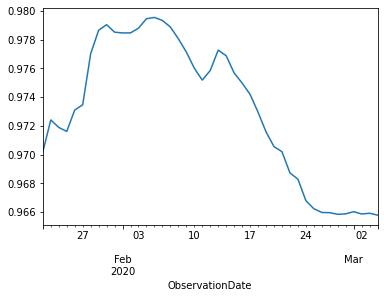

In [55]:
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))['rate'].mean()
sr.plot()

<AxesSubplot:xlabel='ObservationDate'>

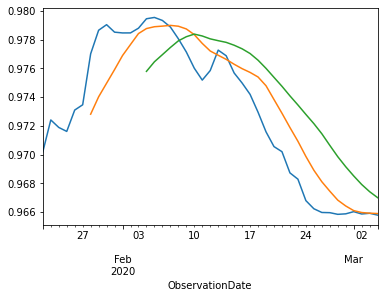

In [56]:
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot()

<AxesSubplot:xlabel='ObservationDate'>

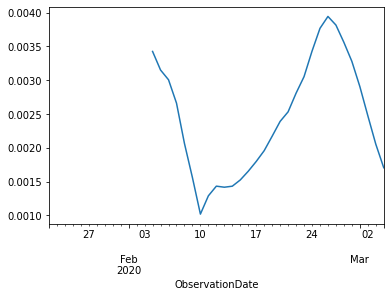

In [61]:
sr.rolling(window=14).std().plot()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=40d7a071-7e6a-4668-9914-a7e81441c111' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>